<a href="https://colab.research.google.com/github/AshbeeKim/Kaggle_task/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os  
from google.colab import drive  
drive.mount('/content/drive')
!cd /content/drive/MyDrive/
!pwd
!ls

Mounted at /content/drive
/content
drive  sample_data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
# import mglearn
import graphviz
import warnings
warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# 최대 줄 수 설정
pd.set_option('display.max_rows', 1500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 1500)
# 표시할 가로의 길이
pd.set_option('display.width', 1500)

# Data

## Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

In [ ]:
data = pd.read_csv('./drive/MyDrive/Task/heart.csv')

In [ ]:
train = data.copy()

In [ ]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
train.shape

(303, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
train.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


## Content

### Attribute Information:
* age
* sex__(1 = male; 0 = female)
* cp : chest pain type (4 values)__0 to 3
* trestbps : resting blood pressure
* chol : serum cholestoral in mg/dl
* fbs : fasting blood sugar > 120 mg/dl__(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results (values 0,1,2)
* thalach : maximum heart rate achieved
* exang : exercise induced angina__(1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
for value in train.columns:
  print(f'{value} : {data[value].isna().sum()}')

age : 0
sex : 0
cp : 0
trestbps : 0
chol : 0
fbs : 0
restecg : 0
thalach : 0
exang : 0
oldpeak : 0
slope : 0
ca : 0
thal : 0
target : 0


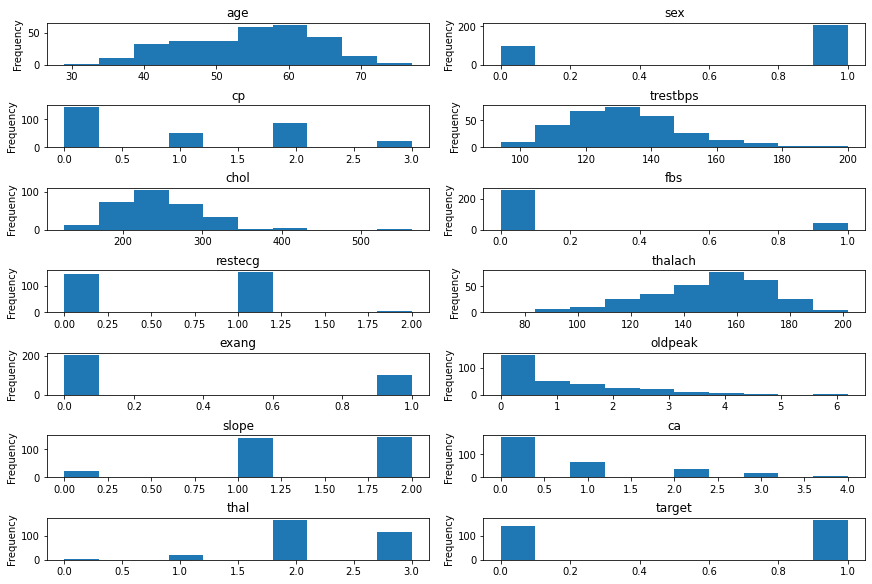

In [ ]:
n = len(train.columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(n//2,n//7,figsize=(12,8),constrained_layout=True)

for i, col in enumerate(train.columns):
  data[col].plot(kind='hist',ax=ax[i//2,i%2],title=col)
plt.show()  

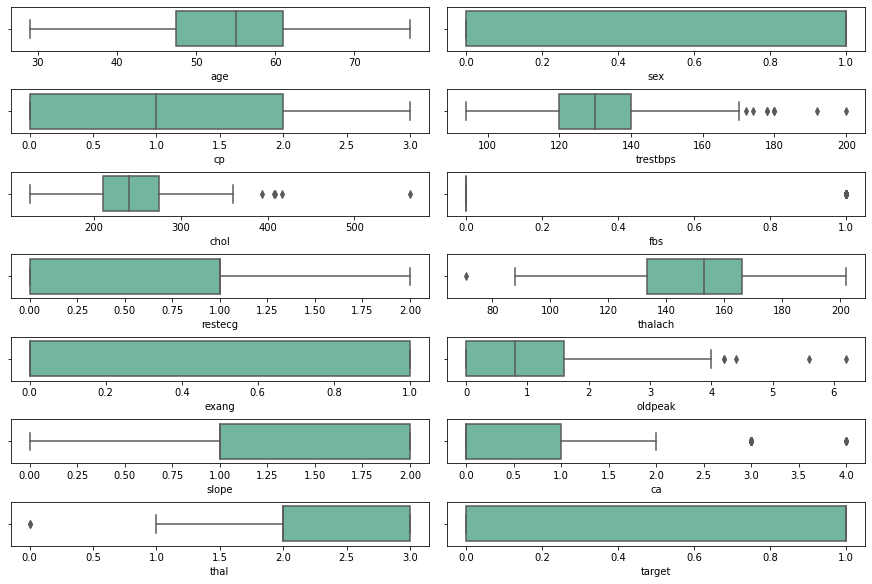

In [ ]:
#outliner_1

n = len(train.columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(n//2,n//7,figsize=(12,8),constrained_layout=True)

for i, col in enumerate(train.columns):
  sns.boxplot(x=col, data=train, ax=ax[i//2,i%2], palette='Set2')
plt.show()  

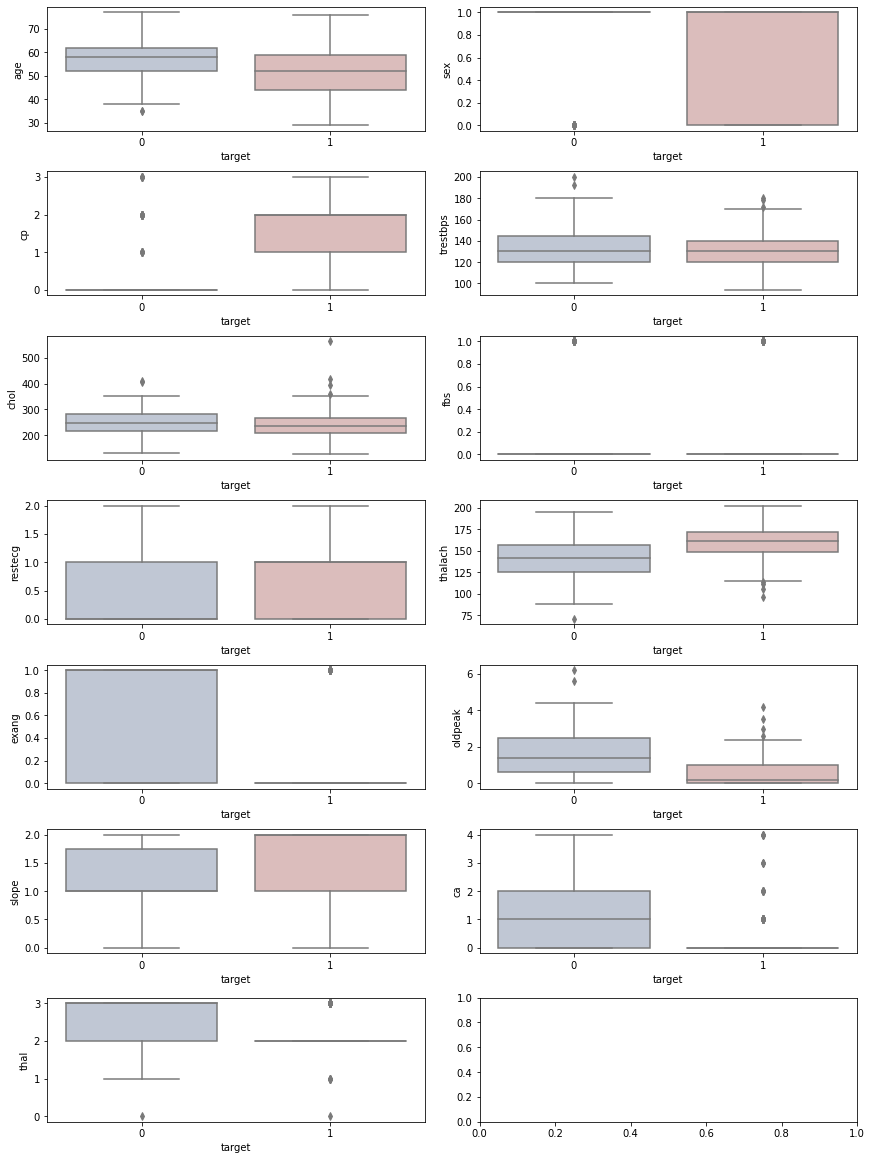

In [ ]:
#outliner_2

wthoutT = train.copy().drop('target',axis=1)
n = len(wthoutT.columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(7,n//6,figsize=(12,16),constrained_layout=True)

for i, col in enumerate(wthoutT.columns):
  sns.boxplot(x='target', y=col, data=train, ax=ax[i//2,i%2], palette='vlag')
plt.show()  

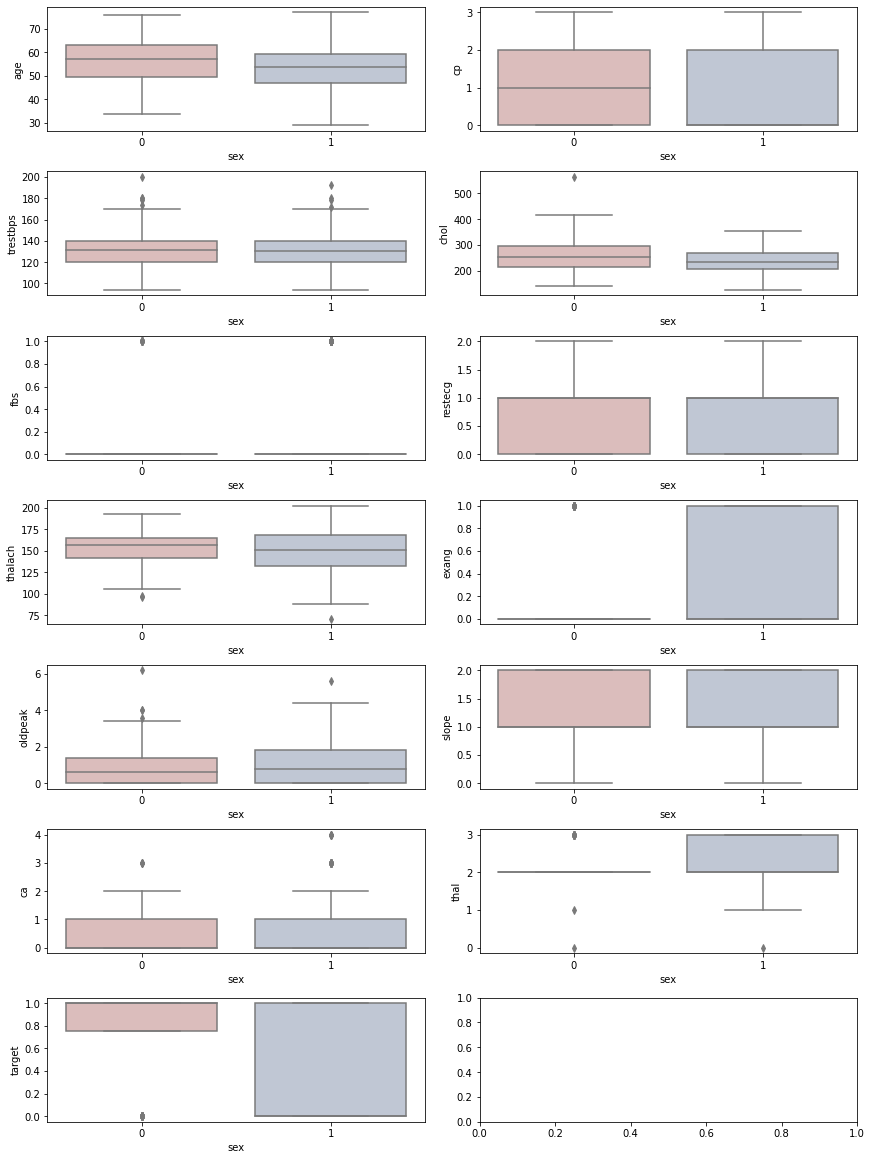

In [ ]:
#outliner_3

wthoutS = train.copy().drop('sex',axis=1)
n = len(wthoutS.columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(7,n//6,figsize=(12,16),constrained_layout=True)

for i, col in enumerate(wthoutS.columns):
  sns.boxplot(x='sex', y=col, data=train, ax=ax[i//2,i%2], palette='vlag_r')
plt.show()  

In [ ]:
#outliner_1 #feature에서 이상치를 확인해봄
outlier = ['trestbps','chol','thalach','oldpeak','ca','thal']
#outliner_2 #target이 0,1일 때, trestbps, chol는 분포 비슷->target을 정할 수 있는 컬럼이 아니라는 뜻
outlier = ['trestbps','chol']
#outliner_3 ##target이 0,1일 때, trestbps, chol는 분포 비슷->sex에 크게 영향을 받는 컬럼이 아니라는 뜻(?)

In [ ]:
def outlier_IQR(,feature):

In [ ]:
for value in train.columns:
  print(f'{value} : {data[value].unique()}')

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

* age--> binning(35, 50, 65,)


In [ ]:
train.corr().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431
